In [137]:
# Oblig 1
# url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'

#Unique features could be
# -Trips per month
# -Number of busses leaving each station in total
# -Number of busses leaving each station in Oslo

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [138]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'
df = pd.read_csv(url, sep=';')

df.head(6000)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,10/06/2020,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2
5996,10010-2020-06-23T05:54:00+02:00,23/06/2020,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2
5997,2007-2020-06-11T17:22:00+02:00,11/06/2020,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3
5998,10004-2020-08-13T04:59:00+02:00,13/08/2020,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5


In [139]:
# feature engineering nr 1

df['Trips_Per_Month'] = df.Dato.apply(lambda x: re.search('/([0-9]+)\/', x).group(1))
df['Trips_Per_Month'].value_counts()

08    2353
07    1971
06    1676
Name: Trips_Per_Month, dtype: int64

In [140]:
# feature engineering nr 2

df['Holdeplass_Fra'].value_counts()

Jenseberget                39
Knatten (Solheimsveien)    38
Ahus                       36
Jonas Lies gate            35
Kloppaveien                29
                           ..
Halden  (mot Snarøya)       1
Sørmarka (i Røyken)         1
Bakk  (mot Bogstad)         1
Bakkevegen (Kløfta)         1
Hellen bru                  1
Name: Holdeplass_Fra, Length: 1632, dtype: int64

In [149]:
# feature engineerng nr 3

dfCopy = df.copy()
dfCopy.where(dfCopy["Fylke"]=="Oslo", inplace = True)
dfCopy = dfCopy.dropna()
dfCopy['Holdeplass_Fra'].value_counts()

Teisenkrysset  (fra Helsfyr)            25
Vålerenga  (mot Galgeberg)              20
Trosterud  (E6 mot Helsfyr)             18
Karihaugen  (mot Furuset)               18
Galgeberg  (fra Etterstad)              17
                                        ..
Sørkedalen skole  (mot Skansebakken)     1
Økernbråten  (mot Linderud)              1
Tåsen allé (mot Tåsen)                   1
Olaus Fjørtofts vei  (mot Stovner T)     1
Fayes gate  (mot Geitmyrsveien)          1
Name: Holdeplass_Fra, Length: 450, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'August'), Text(1, 0, 'Juli'), Text(2, 0, 'Juni')])

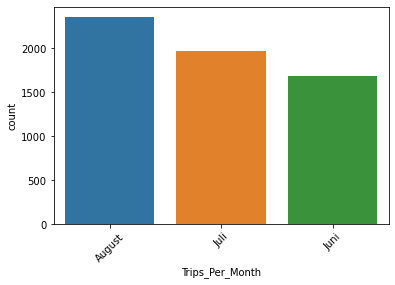

In [142]:
# Graph feature 1

df['Trips_Per_Month'] = df['Trips_Per_Month'].str.replace('06', 'Juni')
df['Trips_Per_Month'] = df['Trips_Per_Month'].str.replace('07', 'Juli')
df['Trips_Per_Month'] = df['Trips_Per_Month'].str.replace('08', 'August')

sns.countplot(x='Trips_Per_Month', data=df)
plt.xticks(rotation=45)

Jenseberget                39
Knatten (Solheimsveien)    38
Ahus                       36
Jonas Lies gate            35
Kloppaveien                29
Name: Holdeplass_Fra, dtype: int64

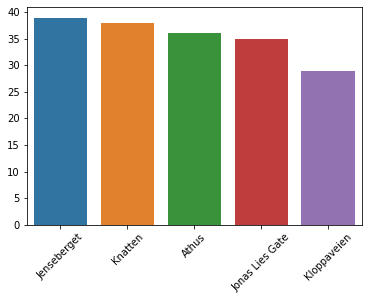

In [143]:
# graph feature 2

stations = df['Holdeplass_Fra'].value_counts().nlargest(5)
sns.barplot(x=['Jenseberget', 'Knatten', 'Athus', 'Jonas Lies Gate', 'Kloppaveien'], y=[39, 38, 36, 35, 29])
plt.xticks(rotation=45)
stations
# Couldn't figure out how to make a map from nlargest since I was unable to give it a header, so I had to "hardcode" the graph, meaning it wont change even if the csv file does


Teisenkrysset  (fra Helsfyr)    25
Vålerenga  (mot Galgeberg)      20
Trosterud  (E6 mot Helsfyr)     18
Karihaugen  (mot Furuset)       18
Galgeberg  (fra Etterstad)      17
Name: Holdeplass_Fra, dtype: int64

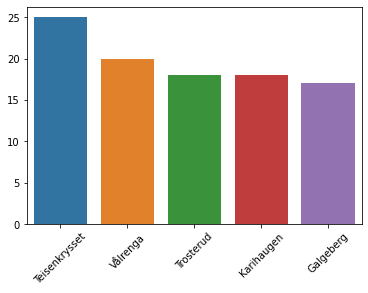

In [161]:
sns.barplot(x=['Teisenkrysset', 'Vålrenga', 'Trosterud', 'Karihaugen', 'Galgeberg'], y=[25, 20, 18, 18, 17])
plt.xticks(rotation=45)

dfCopy['Holdeplass_Fra'].value_counts().nlargest(5)